<a href="https://colab.research.google.com/github/aarsanjani/meansquares/blob/master/version2/feature_engineering/CA_Features_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal:

This colab is used to do diffirent visualizations of the features of CA Combined and Maryland Data



## Mount Google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler as ss
import itertools
from scipy import linalg
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import numpy as np
import matplotlib.pyplot as plt

# 1.Load data - Combined CA Data

## 1.1Preprocessed Data

In [3]:
CA_combined_data = pd.read_csv('/content/drive/Shared drives/CMPE 295- Master Project/projectdata-2021/CA_alldatasets_Jan13.csv',low_memory=False)
CA_combined_data.head()

,Date,Province_State,FIPS,New cases,County Name,population,mask_rule_active,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2020-03-01,California,6001,0,Alameda County,1671329,0,3.684,58,6.0,9.0,15.0,1.0,4.0,0.0
1,2020-03-02,California,6001,0,Alameda County,1671329,0,6.182,98,4.0,7.0,7.0,-1.0,3.0,0.0
2,2020-03-03,California,6001,1,Alameda County,1671329,0,6.271,100,5.0,12.0,41.0,0.0,1.0,-1.0
3,2020-03-04,California,6001,0,Alameda County,1671329,0,6.209,99,1.0,6.0,23.0,-3.0,1.0,0.0
4,2020-03-05,California,6001,0,Alameda County,1671329,0,6.654,106,1.0,6.0,12.0,-5.0,-1.0,1.0


In [ ]:
CA_combined_data.dtypes

Date                                                   object
Province_State                                         object
FIPS                                                    int64
New cases                                               int64
County Name                                            object
population                                              int64
mask_rule_active                                        int64
m50                                                   float64
m50_index                                               int64
retail_and_recreation_percent_change_from_baseline    float64
grocery_and_pharmacy_percent_change_from_baseline     float64
parks_percent_change_from_baseline                    float64
transit_stations_percent_change_from_baseline         float64
workplaces_percent_change_from_baseline               float64
residential_percent_change_from_baseline              float64
dtype: object

## 1.2Labeled  Data

In [4]:
CA_labeled_data = pd.read_csv('/content/drive/Shared drives/CMPE 295- Master Project/projectdata-2021/CA_CombinedData_Labeled_CDCGuideline_Jan15.csv',low_memory=False)
CA_labeled_data.head()

,Date,Province_State,FIPS,County Name,population,mask_rule_active,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,New Cases/100k population,rolling_avg_new_cases/100k,New cases,growth_label
0,2020-03-01,California,6001,Alameda County,1671329,0,3.684,58,6.0,9.0,15.0,1.0,4.0,0.0,0.000000,0.0,0.0,minimal
1,2020-03-02,California,6001,Alameda County,1671329,0,6.182,98,4.0,7.0,7.0,-1.0,3.0,0.0,0.000000,0.0,0.0,minimal
2,2020-03-03,California,6001,Alameda County,1671329,0,6.271,100,5.0,12.0,41.0,0.0,1.0,-1.0,0.059833,0.0,1.0,minimal
3,2020-03-04,California,6001,Alameda County,1671329,0,6.209,99,1.0,6.0,23.0,-3.0,1.0,0.0,0.000000,0.0,0.0,minimal
4,2020-03-05,California,6001,Alameda County,1671329,0,6.654,106,1.0,6.0,12.0,-5.0,-1.0,1.0,0.000000,0.0,0.0,minimal


In [ ]:
CA_labeled_data.dtypes

Date                                                   object
Province_State                                         object
FIPS                                                    int64
County Name                                            object
population                                              int64
mask_rule_active                                        int64
m50                                                   float64
m50_index                                               int64
retail_and_recreation_percent_change_from_baseline    float64
grocery_and_pharmacy_percent_change_from_baseline     float64
parks_percent_change_from_baseline                    float64
transit_stations_percent_change_from_baseline         float64
workplaces_percent_change_from_baseline               float64
residential_percent_change_from_baseline              float64
New Cases/100k population                             float64
rolling_avg_new_cases/100k                            float64
New case

In [ ]:
CA_labeled_data.shape

(15821, 18)

## Preprocessing data 

* drop na
* convert categorical code

In [ ]:
CA_combined_data = CA_combined_data.dropna()

In [ ]:
CA_combined_data.dtypes

Date                                                   object
Province_State                                         object
FIPS                                                    int64
New cases                                               int64
County Name                                            object
population                                              int64
mask_rule_active                                        int64
m50                                                   float64
m50_index                                               int64
retail_and_recreation_percent_change_from_baseline    float64
grocery_and_pharmacy_percent_change_from_baseline     float64
parks_percent_change_from_baseline                    float64
transit_stations_percent_change_from_baseline         float64
workplaces_percent_change_from_baseline               float64
residential_percent_change_from_baseline              float64
dtype: object

In [ ]:
CA_combined_data.shape

(10478, 15)

## Correlation Plot

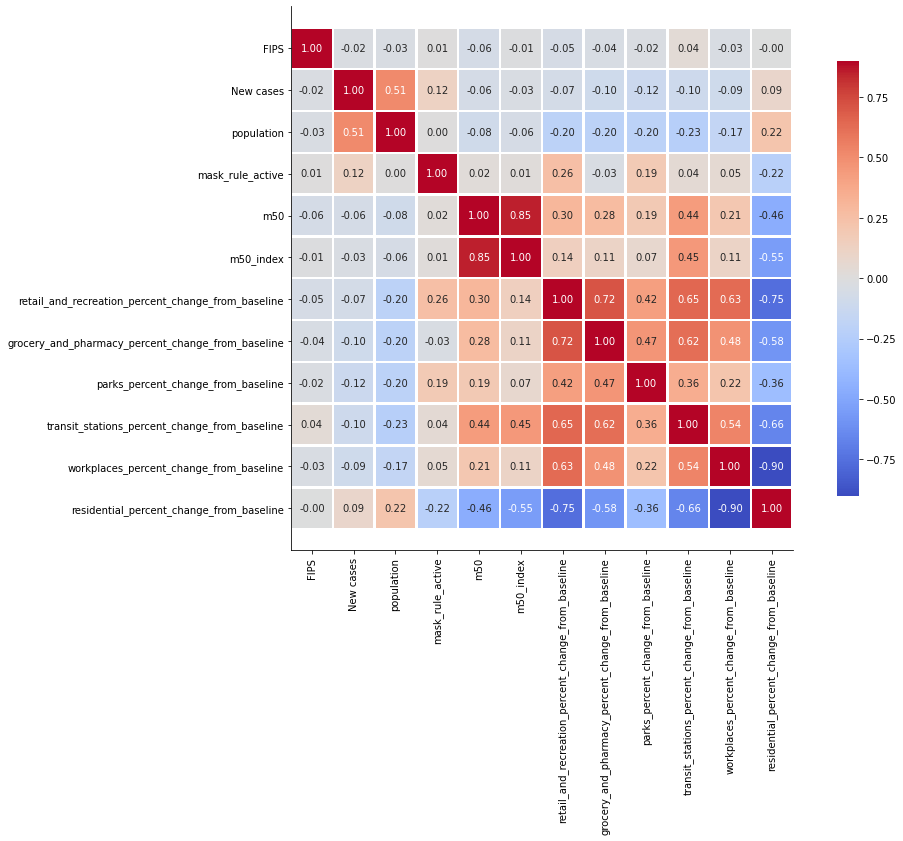

In [5]:

corr = CA_combined_data.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

## Box Plot

https://machinelearningmastery.com/time-series-data-visualization-with-python/

In [7]:
CA_combined_data_filtered = CA_combined_data[['FIPS','population','mask_rule_active','m50','m50_index',
                                              'retail_and_recreation_percent_change_from_baseline','grocery_and_pharmacy_percent_change_from_baseline',
                                              'parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline',
                                              'residential_percent_change_from_baseline','New cases']]

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


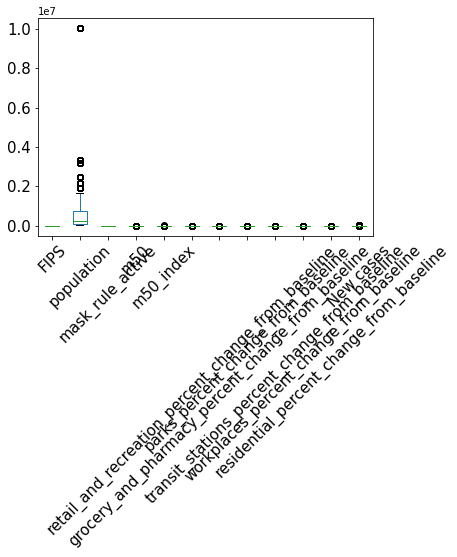

In [8]:
CA_combined_data_filtered.boxplot(grid=False, rot=45, fontsize=15)

# 2.Load data - Maryland Inertia Data

## 2.1Preprocessed Data

In [ ]:
CA_inertia_data = pd.read_csv('/content/drive/Shared drives/CMPE 295- Master Project/projectdata-2021/CA_processedMarylandData_Jan11.csv',low_memory=False)
CA_inertia_data.head()

,countyFIPS,County Name,State,population,CTFIPS,CTNAME,STFIPS,Social.distancing.index,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,New.COVID.cases,Population,X..change.in.consumption,date,Transit.mode.share,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,Population.density,Employment.density,X..hot.spots.1000.people,Hospital.beds.1000.people,ICUs.1000.people,X..contact.tracing.workers.1000.people,New.cases.1000.people,Active.cases.1000.people,X.days..decreasing.COVID.cases,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,Imported.COVID.cases,COVID.exposure.1000.people,X.days..decreasing.ILI.cases,Unemployment.claims.1000.people,Unemployment.rate,X..working.from.home,Cumulative.inflation.rate,COVID.death.rate
0,6001,Alameda County,CA,1671329,6001,Alameda County,6,50,32,2.41,26.1,0.4,38.0,0.20,2.21,0,1666753,-21.7,2020-01-01,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,NaN,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,0.9,3.9,5.7,0.3,0.0
1,6001,Alameda County,CA,1671329,6001,Alameda County,6,24,22,3.17,27.9,0.4,38.5,0.50,2.66,0,1666753,-5.8,2020-01-02,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,NaN,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,0.9,3.9,5.7,0.3,0.0
2,6001,Alameda County,CA,1671329,6001,Alameda County,6,21,21,3.28,27.2,0.4,41.0,0.51,2.78,0,1666753,-1.5,2020-01-03,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,NaN,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,0.9,3.9,5.7,0.3,0.0
3,6001,Alameda County,CA,1671329,6001,Alameda County,6,34,25,3.03,25.8,0.3,41.1,0.26,2.76,0,1666753,-2.2,2020-01-04,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,NaN,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,0.9,3.9,5.7,0.3,0.0
4,6001,Alameda County,CA,1671329,6001,Alameda County,6,44,29,2.72,24.5,0.4,35.8,0.24,2.48,0,1666753,-12.1,2020-01-05,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,NaN,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,1.3,3.9,5.7,0.3,0.0


In [ ]:
CA_inertia_data.dtypes

countyFIPS                                  int64
County Name                                object
State                                      object
population                                  int64
CTFIPS                                      int64
CTNAME                                     object
STFIPS                                      int64
Social.distancing.index                     int64
X..staying.home                             int64
Trips.person                              float64
X..out.of.county.trips                    float64
X..out.of.state.trips                     float64
Miles.person                              float64
Work.trips.person                         float64
Non.work.trips.person                     float64
New.COVID.cases                             int64
Population                                  int64
X..change.in.consumption                  float64
date                                       object
Transit.mode.share                        float64


## 2.2Labeled  Data

In [ ]:
CA_inertia_labeled_data = pd.read_csv('/content/drive/Shared drives/CMPE 295- Master Project/projectdata-2021/CA_MarylandData_Labeled_CDCGuideline_Jan15.csv',low_memory=False)
CA_inertia_labeled_data.head()

,County Name,State,population,CTFIPS,CTNAME,STFIPS,Social.distancing.index,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,New.COVID.cases,Population,X..change.in.consumption,date,Transit.mode.share,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,Population.density,Employment.density,X..hot.spots.1000.people,Hospital.beds.1000.people,ICUs.1000.people,X..contact.tracing.workers.1000.people,New.cases.1000.people,Active.cases.1000.people,X.days..decreasing.COVID.cases,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,Imported.COVID.cases,COVID.exposure.1000.people,X.days..decreasing.ILI.cases,Unemployment.claims.1000.people,Unemployment.rate,X..working.from.home,Cumulative.inflation.rate,COVID.death.rate,New Cases/100k population,rolling_avg_new_cases/100k,countyFIPS,growth_label
0,Alameda County,CA,1671329,6001,Alameda County,6,50,32,2.41,26.1,0.4,38.0,0.20,2.21,0,1666753,-21.7,2020-01-01,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,0.9,3.9,5.7,0.3,0.0,0.0,0.0,6001.0,minimal
1,Alameda County,CA,1671329,6001,Alameda County,6,24,22,3.17,27.9,0.4,38.5,0.50,2.66,0,1666753,-5.8,2020-01-02,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,0.9,3.9,5.7,0.3,0.0,0.0,0.0,6001.0,minimal
2,Alameda County,CA,1671329,6001,Alameda County,6,21,21,3.28,27.2,0.4,41.0,0.51,2.78,0,1666753,-1.5,2020-01-03,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,0.9,3.9,5.7,0.3,0.0,0.0,0.0,6001.0,minimal
3,Alameda County,CA,1671329,6001,Alameda County,6,34,25,3.03,25.8,0.3,41.1,0.26,2.76,0,1666753,-2.2,2020-01-04,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,0.9,3.9,5.7,0.3,0.0,0.0,0.0,6001.0,minimal
4,Alameda County,CA,1671329,6001,Alameda County,6,44,29,2.72,24.5,0.4,35.8,0.24,2.48,0,1666753,-12.1,2020-01-05,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,1.3,3.9,5.7,0.3,0.0,0.0,0.0,6001.0,minimal


In [ ]:
CA_inertia_labeled_data.dtypes

County Name                                object
State                                      object
population                                  int64
CTFIPS                                      int64
CTNAME                                     object
STFIPS                                      int64
Social.distancing.index                     int64
X..staying.home                             int64
Trips.person                              float64
X..out.of.county.trips                    float64
X..out.of.state.trips                     float64
Miles.person                              float64
Work.trips.person                         float64
Non.work.trips.person                     float64
New.COVID.cases                             int64
Population                                  int64
X..change.in.consumption                  float64
date                                       object
Transit.mode.share                        float64
X..people.older.than.60                     int64


In [ ]:
CA_inertia_labeled_data.shape

(21054, 50)

## Preprocessing data 

* drop na
* convert categorical code

In [ ]:
CA_inertia_labeled_data = CA_inertia_labeled_data.fillna(0)

,Date,Province_State,FIPS,Confirmed,Deaths,New cases,New deaths,mask_rule_active,CTFIPS,CTNAME,STFIPS,Social distancing index,% staying home,Trips/person,% out-of-county trips,% out-of-state trips,Miles/person,Work trips/person,Non-work trips/person,New COVID cases,Population,% change in consumption,date,Transit mode share,% people older than 60,Median income,% African Americans,% Hispanic Americans,% Male,Population density,Employment density,# hot spots/1000 people,Hospital beds/1000 people,ICUs/1000 people,# contact tracing workers/1000 people,# contact tracing workers/1000 people rank,% people older than 60 rank,COVID exposure/1000 people,#days: decreasing ILI cases,Unemployment claims/1000 people,Unemployment rate,% working from home,Cumulative inflation rate,COVID death rate,New cases/1000 people,Active cases/1000 people,#days: decreasing COVID cases,% hospital bed utilization,Testing capacity,Tests done/1000 people,% ICU utilization,Ventilator shortage,Imported COVID cases,growth_label,growth_code
0,2020-01-22,California,6001,0,0,0,0,0,6001,Alameda County,6,18,20,3.29,29.4,0.3,35.9,0.55,2.74,0,1666753,-2.9,2020-01-22,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0,12,0.0,0,1.2,3.9,5.7,0.3,0.0,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,drastic_decrement,0
1,2020-01-23,California,6001,0,0,0,0,0,6001,Alameda County,6,15,19,3.36,29.6,0.3,35.4,0.56,2.80,0,1666753,-0.8,2020-01-23,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0,12,0.0,0,1.2,3.9,5.7,0.3,0.0,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,drastic_decrement,0
2,2020-01-24,California,6001,0,0,0,0,0,6001,Alameda County,6,15,19,3.48,29.0,0.3,39.1,0.53,2.94,0,1666753,4.1,2020-01-24,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0,12,0.0,0,1.2,3.9,5.7,0.3,0.0,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,drastic_decrement,0
3,2020-01-25,California,6001,0,0,0,0,0,6001,Alameda County,6,30,24,3.16,26.6,0.3,36.3,0.27,2.88,0,1666753,2.0,2020-01-25,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0,12,0.0,0,1.2,3.9,5.7,0.3,0.0,0.0,0.0,1,54.0,0.0,0.0,0.0,0,0,drastic_decrement,0
4,2020-01-26,California,6001,0,0,0,0,0,6001,Alameda County,6,41,28,2.80,25.6,0.4,35.4,0.24,2.56,0,1666753,-9.3,2020-01-26,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0,12,0.0,0,1.1,3.9,5.7,0.3,0.0,0.0,0.0,2,54.0,0.0,0.0,0.0,0,0,drastic_decrement,0


In [ ]:
CA_inertia_labeled_data['growth_code'].unique()

array([0, 3, 2, 1], dtype=int8)

In [ ]:
CA_inertia_labeled_data.columns

Index(['County Name', 'State', 'population', 'CTFIPS', 'CTNAME', 'STFIPS',
       'Social.distancing.index', 'X..staying.home', 'Trips.person',
       'X..out.of.county.trips', 'X..out.of.state.trips', 'Miles.person',
       'Work.trips.person', 'Non.work.trips.person', 'New.COVID.cases',
       'Population', 'X..change.in.consumption', 'date', 'Transit.mode.share',
       'X..people.older.than.60', 'Median.income', 'X..African.Americans',
       'X..Hispanic.Americans', 'X..Male', 'Population.density',
       'Employment.density', 'X..hot.spots.1000.people',
       'Hospital.beds.1000.people', 'ICUs.1000.people',
       'X..contact.tracing.workers.1000.people', 'New.cases.1000.people',
       'Active.cases.1000.people', 'X.days..decreasing.COVID.cases',
       'X..hospital.bed.utilization', 'Testing.capacity',
       'Tests.done.1000.people', 'X..ICU.utilization', 'Ventilator.shortage',
       'Imported.COVID.cases', 'COVID.exposure.1000.people',
       'X.days..decreasing.ILI.cases',

## Feature Importance: Gini-Coefficient

In [ ]:
CA_inertia_data.columns

Index(['countyFIPS', 'County Name', 'State', 'population', 'CTFIPS', 'CTNAME',
       'STFIPS', 'Social.distancing.index', 'X..staying.home', 'Trips.person',
       'X..out.of.county.trips', 'X..out.of.state.trips', 'Miles.person',
       'Work.trips.person', 'Non.work.trips.person', 'New.COVID.cases',
       'Population', 'X..change.in.consumption', 'date', 'Transit.mode.share',
       'X..people.older.than.60', 'Median.income', 'X..African.Americans',
       'X..Hispanic.Americans', 'X..Male', 'Population.density',
       'Employment.density', 'X..hot.spots.1000.people',
       'Hospital.beds.1000.people', 'ICUs.1000.people',
       'X..contact.tracing.workers.1000.people', 'New.cases.1000.people',
       'Active.cases.1000.people', 'X.days..decreasing.COVID.cases',
       'X..hospital.bed.utilization', 'Testing.capacity',
       'Tests.done.1000.people', 'X..ICU.utilization', 'Ventilator.shortage',
       'Imported.COVID.cases', 'COVID.exposure.1000.people',
       'X.days..decreasi

In [ ]:
CA_inertia_data.dtypes

countyFIPS                                  int64
County Name                                object
State                                      object
population                                  int64
CTFIPS                                      int64
CTNAME                                     object
STFIPS                                      int64
Social.distancing.index                     int64
X..staying.home                             int64
Trips.person                              float64
X..out.of.county.trips                    float64
X..out.of.state.trips                     float64
Miles.person                              float64
Work.trips.person                         float64
Non.work.trips.person                     float64
New.COVID.cases                             int64
Population                                  int64
X..change.in.consumption                  float64
date                                       object
Transit.mode.share                        float64


In [ ]:
def gini(list_of_values):
    sorted_list = sorted(list_of_values)
    height, area = 0, 0
    for value in sorted_list:
        height += value
        area += height - value / 2.
    fair_area = height * len(list_of_values) / 2.
    return (fair_area - area) / fair_area

In [ ]:
feature_cols=['countyFIPS','population','Social.distancing.index', 'X..staying.home', 'Trips.person',
       'X..out.of.county.trips', 'X..out.of.state.trips', 'Miles.person',
       'Work.trips.person', 'Non.work.trips.person', 'New.COVID.cases',
       'Population', 'X..change.in.consumption', 'Transit.mode.share',
       'X..people.older.than.60', 'Median.income', 'X..African.Americans',
       'X..Hispanic.Americans', 'X..Male', 'Population.density',
       'Employment.density', 'X..hot.spots.1000.people',
       'Hospital.beds.1000.people', 'ICUs.1000.people',
        'New.cases.1000.people',
       'Active.cases.1000.people', 'X.days..decreasing.COVID.cases',
       'X..hospital.bed.utilization', 'Testing.capacity',
       'Tests.done.1000.people', 'X..ICU.utilization', 'Ventilator.shortage',
       'Imported.COVID.cases', 'COVID.exposure.1000.people',
       'X.days..decreasing.ILI.cases', 'Unemployment.claims.1000.people',
       'Unemployment.rate', 'X..working.from.home',
       'Cumulative.inflation.rate', 'COVID.death.rate']
gini_values = []
for col in feature_cols:
  dataset = CA_inertia_data[col].values.tolist()
  value = gini(dataset)
  print('cols ',col,' - gini coeff is :',value)
  gini_values.append(value)

cols  countyFIPS  - gini coeff is : 0.003190423606288635
cols  population  - gini coeff is : 0.7271503279831434
cols  Social.distancing.index  - gini coeff is : 0.2101171823534342
cols  X..staying.home  - gini coeff is : 0.12849262222403574
cols  Trips.person  - gini coeff is : 0.08263099390364957
cols  X..out.of.county.trips  - gini coeff is : 0.2598636242639775
cols  X..out.of.state.trips  - gini coeff is : 0.781262587537032
cols  Miles.person  - gini coeff is : 0.1947003935074699
cols  Work.trips.person  - gini coeff is : 0.21275655792872486
cols  Non.work.trips.person  - gini coeff is : 0.08391715245194091
cols  New.COVID.cases  - gini coeff is : 0.9029034514283721
cols  Population  - gini coeff is : 0.7274984244599945
cols  X..change.in.consumption  - gini coeff is : -1.4436803085730106
cols  Transit.mode.share  - gini coeff is : 0.662719746084874
cols  X..people.older.than.60  - gini coeff is : 0.1587058941459503
cols  Median.income  - gini coeff is : 0.15590487167885286
cols  X.

## Feature Importance: Random Forest classifier(Gini Score)

* old for reference

inertia_feature_labels = ['mask_rule_active','Social distancing index','% staying home', 'Trips/person', '% out-of-county trips',
       '% out-of-state trips', 'Miles/person', 'Work trips/person','Non-work trips/person','% change in consumption',
       'Transit mode share','% people older than 60', 'Median income', '% African Americans', '% Hispanic Americans',
       '% Male', 'Population density','Employment density', '# hot spots/1000 people','Hospital beds/1000 people', 'ICUs/1000 people',
       '# contact tracing workers/1000 people rank','% people older than 60 rank', 'COVID exposure/1000 people',
       'Unemployment claims/1000 people', 'Unemployment rate','% working from home', 'Cumulative inflation rate',
       '% hospital bed utilization', 'Testing capacity','Tests done/1000 people', '% ICU utilization', 'Ventilator shortage'
       ]

In [ ]:
CA_inertia_labeled_data['growth_code'] = CA_inertia_labeled_data['growth_label'].astype('category').cat.codes
CA_inertia_labeled_data.head()

,County Name,State,population,CTFIPS,CTNAME,STFIPS,Social.distancing.index,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,New.COVID.cases,Population,X..change.in.consumption,date,Transit.mode.share,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,Population.density,Employment.density,X..hot.spots.1000.people,Hospital.beds.1000.people,ICUs.1000.people,X..contact.tracing.workers.1000.people,New.cases.1000.people,Active.cases.1000.people,X.days..decreasing.COVID.cases,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,Imported.COVID.cases,COVID.exposure.1000.people,X.days..decreasing.ILI.cases,Unemployment.claims.1000.people,Unemployment.rate,X..working.from.home,Cumulative.inflation.rate,COVID.death.rate,New Cases/100k population,rolling_avg_new_cases/100k,countyFIPS,growth_label,growth_code
0,Alameda County,CA,1671329,6001,Alameda County,6,50,32,2.41,26.1,0.4,38.0,0.20,2.21,0,1666753,-21.7,2020-01-01,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,0.9,3.9,5.7,0.3,0.0,0.0,0.0,6001.0,minimal,0
1,Alameda County,CA,1671329,6001,Alameda County,6,24,22,3.17,27.9,0.4,38.5,0.50,2.66,0,1666753,-5.8,2020-01-02,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,0.9,3.9,5.7,0.3,0.0,0.0,0.0,6001.0,minimal,0
2,Alameda County,CA,1671329,6001,Alameda County,6,21,21,3.28,27.2,0.4,41.0,0.51,2.78,0,1666753,-1.5,2020-01-03,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,0.9,3.9,5.7,0.3,0.0,0.0,0.0,6001.0,minimal,0
3,Alameda County,CA,1671329,6001,Alameda County,6,34,25,3.03,25.8,0.3,41.1,0.26,2.76,0,1666753,-2.2,2020-01-04,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,0.9,3.9,5.7,0.3,0.0,0.0,0.0,6001.0,minimal,0
4,Alameda County,CA,1671329,6001,Alameda County,6,44,29,2.72,24.5,0.4,35.8,0.24,2.48,0,1666753,-12.1,2020-01-05,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,1.3,3.9,5.7,0.3,0.0,0.0,0.0,6001.0,minimal,0


In [ ]:
CA_inertia_labeled_data.columns

Index(['County Name', 'State', 'population', 'CTFIPS', 'CTNAME', 'STFIPS',
       'Social.distancing.index', 'X..staying.home', 'Trips.person',
       'X..out.of.county.trips', 'X..out.of.state.trips', 'Miles.person',
       'Work.trips.person', 'Non.work.trips.person', 'New.COVID.cases',
       'Population', 'X..change.in.consumption', 'date', 'Transit.mode.share',
       'X..people.older.than.60', 'Median.income', 'X..African.Americans',
       'X..Hispanic.Americans', 'X..Male', 'Population.density',
       'Employment.density', 'X..hot.spots.1000.people',
       'Hospital.beds.1000.people', 'ICUs.1000.people',
       'X..contact.tracing.workers.1000.people', 'New.cases.1000.people',
       'Active.cases.1000.people', 'X.days..decreasing.COVID.cases',
       'X..hospital.bed.utilization', 'Testing.capacity',
       'Tests.done.1000.people', 'X..ICU.utilization', 'Ventilator.shortage',
       'Imported.COVID.cases', 'COVID.exposure.1000.people',
       'X.days..decreasing.ILI.cases',

In [ ]:
inertia_feature_labels = ['Social.distancing.index', 'X..staying.home', 'Trips.person',
       'X..out.of.county.trips', 'X..out.of.state.trips', 'Miles.person',
       'Work.trips.person', 'Non.work.trips.person', 'New.COVID.cases',
       'Population', 'X..change.in.consumption',  'Transit.mode.share',
       'X..people.older.than.60', 'Median.income', 'X..African.Americans',
       'X..Hispanic.Americans', 'X..Male', 'Population.density',
       'Employment.density', 'X..hot.spots.1000.people',
       'Hospital.beds.1000.people', 'ICUs.1000.people',
       'X..contact.tracing.workers.1000.people', 'New.cases.1000.people',
       'Active.cases.1000.people', 'X.days..decreasing.COVID.cases',
       'X..hospital.bed.utilization', 'Testing.capacity',
       'Tests.done.1000.people', 'X..ICU.utilization', 'Ventilator.shortage',
       'Imported.COVID.cases', 'COVID.exposure.1000.people',
       'X.days..decreasing.ILI.cases', 'Unemployment.claims.1000.people',
       'Unemployment.rate', 'X..working.from.home',
       'Cumulative.inflation.rate', 'COVID.death.rate',
       'New Cases/100k population'
       ]

inertia_target_column = ['growth_code']

X = CA_inertia_labeled_data[inertia_feature_labels]
y = CA_inertia_labeled_data[inertia_target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


In [ ]:

#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 
clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='gini', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)
print(X_train.shape)
# Print the name and gini importance of each feature
for feature in zip(inertia_feature_labels, clf.feature_importances_):
    print(feature)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


(12632, 40)
('Social.distancing.index', 0.008569001433721852)
('X..staying.home', 0.00751009853554587)
('Trips.person', 0.00814980351955795)
('X..out.of.county.trips', 0.012280066897759477)
('X..out.of.state.trips', 0.010215166980354854)
('Miles.person', 0.010321160943401375)
('Work.trips.person', 0.00899740470533878)
('Non.work.trips.person', 0.008102137661789388)
('New.COVID.cases', 0.029492122302641876)
('Population', 0.016945151480419435)
('X..change.in.consumption', 0.008699270797552543)
('Transit.mode.share', 0.00951666481306594)
('X..people.older.than.60', 0.012683008951058634)
('Median.income', 0.011042403751952156)
('X..African.Americans', 0.008683879251341538)
('X..Hispanic.Americans', 0.023349270686642627)
('X..Male', 0.007867921719563601)
('Population.density', 0.012558056381689029)
('Employment.density', 0.010553957477057088)
('X..hot.spots.1000.people', 0.010873331263167474)
('Hospital.beds.1000.people', 0.0)
('ICUs.1000.people', 0.0)
('X..contact.tracing.workers.1000.peo

## Feature Importance: Extra tree classifier

In [ ]:
inertia_feature_labels = ['Social.distancing.index', 'X..staying.home', 'Trips.person',
       'X..out.of.county.trips', 'X..out.of.state.trips', 'Miles.person',
       'Work.trips.person', 'Non.work.trips.person', 'New.COVID.cases',
       'Population', 'X..change.in.consumption',  'Transit.mode.share',
       'X..people.older.than.60', 'Median.income', 'X..African.Americans',
       'X..Hispanic.Americans', 'X..Male', 'Population.density',
       'Employment.density', 'X..hot.spots.1000.people',
       'Hospital.beds.1000.people', 'ICUs.1000.people',
       'X..contact.tracing.workers.1000.people', 'New.cases.1000.people',
       'Active.cases.1000.people', 'X.days..decreasing.COVID.cases',
       'X..hospital.bed.utilization', 'Testing.capacity',
       'Tests.done.1000.people', 'X..ICU.utilization', 'Ventilator.shortage',
       'Imported.COVID.cases', 'COVID.exposure.1000.people',
       'X.days..decreasing.ILI.cases', 'Unemployment.claims.1000.people',
       'Unemployment.rate', 'X..working.from.home',
       'Cumulative.inflation.rate', 'COVID.death.rate',
       'New Cases/100k population'
       ]

inertia_target_column = ['growth_code']

X = CA_inertia_labeled_data[inertia_feature_labels]
y = CA_inertia_labeled_data[inertia_target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [ ]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='gini', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())
# display the relative importance of each attribute
#print(model.feature_importances_)


# create the RFE model 
rfe = RFE(model, 3)
rfe = rfe.fit(X, y.values.ravel())
# summarize the selection of the attributes
#print(rfe.support_)

print("\nFeatures with ranking:\n")
for index in range(len(rfe.ranking_)):
  print(inertia_feature_labels[index], rfe.ranking_[index])

# for index in range(len(rfe.ranking_)):
#   print( rfe.ranking_[index])
#print(rfe.ranking_)
#print(rfe.n_features_)
#rfe.n_features_to_select


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


('FIPS', 0.008569001433721852)
('population', 0.00751009853554587)
('mask_rule_active', 0.00814980351955795)
('m50', 0.012280066897759477)
('m50_index', 0.010215166980354854)
('retail_and_recreation_percent_change_from_baseline', 0.010321160943401375)
('grocery_and_pharmacy_percent_change_from_baseline', 0.00899740470533878)
('parks_percent_change_from_baseline', 0.008102137661789388)
('transit_stations_percent_change_from_baseline', 0.029492122302641876)
('workplaces_percent_change_from_baseline', 0.016945151480419435)
('residential_percent_change_from_baseline', 0.008699270797552543)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


('FIPS', 0.008569001433721852)
('population', 0.00751009853554587)
('mask_rule_active', 0.00814980351955795)
('m50', 0.012280066897759477)
('m50_index', 0.010215166980354854)
('retail_and_recreation_percent_change_from_baseline', 0.010321160943401375)
('grocery_and_pharmacy_percent_change_from_baseline', 0.00899740470533878)
('parks_percent_change_from_baseline', 0.008102137661789388)
('transit_stations_percent_change_from_baseline', 0.029492122302641876)
('workplaces_percent_change_from_baseline', 0.016945151480419435)
('residential_percent_change_from_baseline', 0.008699270797552543)

Features with ranking:

Social.distancing.index 31
X..staying.home 30
Trips.person 35
X..out.of.county.trips 27
X..out.of.state.trips 25
Miles.person 32
Work.trips.person 29
Non.work.trips.person 34
New.COVID.cases 28
Population 10
X..change.in.consumption 33
Transit.mode.share 19
X..people.older.than.60 5
Median.income 7
X..African.Americans 24
X..Hispanic.Americans 2
X..Male 26
Population.density 13
E